In [18]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fonctions as fc

# Charger les données dans un DataFrame pandas
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [21]:
data.sample(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2375,25435,2016,Multifamily LR (1-4),Low-Rise Multifamily,Daystar Retirement Village,2615 SW Barton Street,Seattle,WA,98126.0,6882300020,...,792125.00,2702730.0,8889.219727,888922.0,False,NaN,Compliant,NaN,66.05,0.74
1033,20565,2016,NonResidential,Supermarket / Grocery Store,Safeway 0368 - Queen Anne,2100 Queen Anne Ave N,Seattle,WA,98109.0,1794500895,...,1429919.75,4878886.0,40264.003910,4026400.0,False,NaN,Compliant,NaN,247.85,9.85


In [20]:
fc.etude_fichier(data)

Nombre de colonnes : (3376, 46)

Le type est : 
 OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
Large

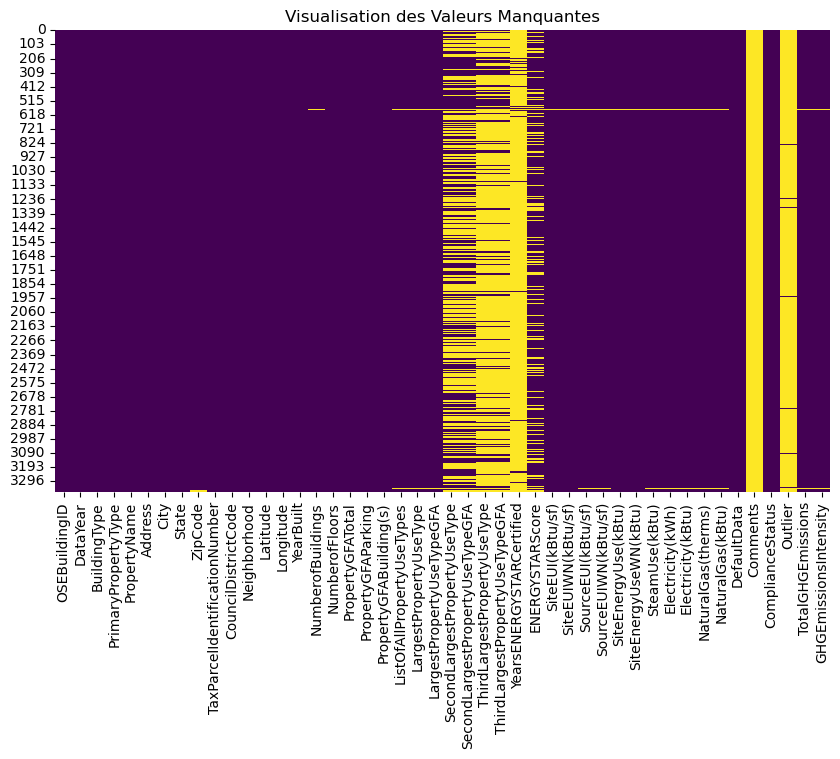

In [19]:
fc.visualiser_valeurs_manquantes(data)

In [47]:
import pandas as pd

# Assuming your DataFrame is named 'df'
threshold = len(data) * 0.5  # 50% threshold
data.dropna(thresh=threshold, axis=1, inplace=True)


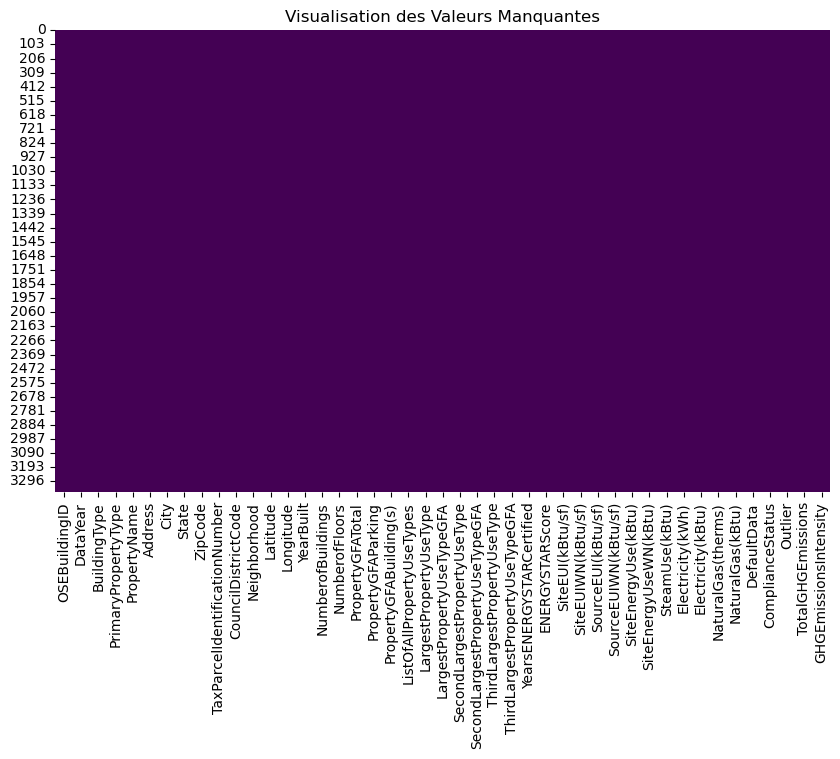

In [48]:
fc.visualiser_valeurs_manquantes(data)

In [22]:
fc.etude_outliers(data)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'OSEBuildingID' est 6.52%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'DataYear' est 0.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'ZipCode' est 3.32%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'CouncilDistrictCode' est 0.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'Latitude' est 6.13%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'Longitude' est 5.12%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'YearBuilt' est 2.19%
Le pourcentage de valeurs considérées comme des outliers en utilisan

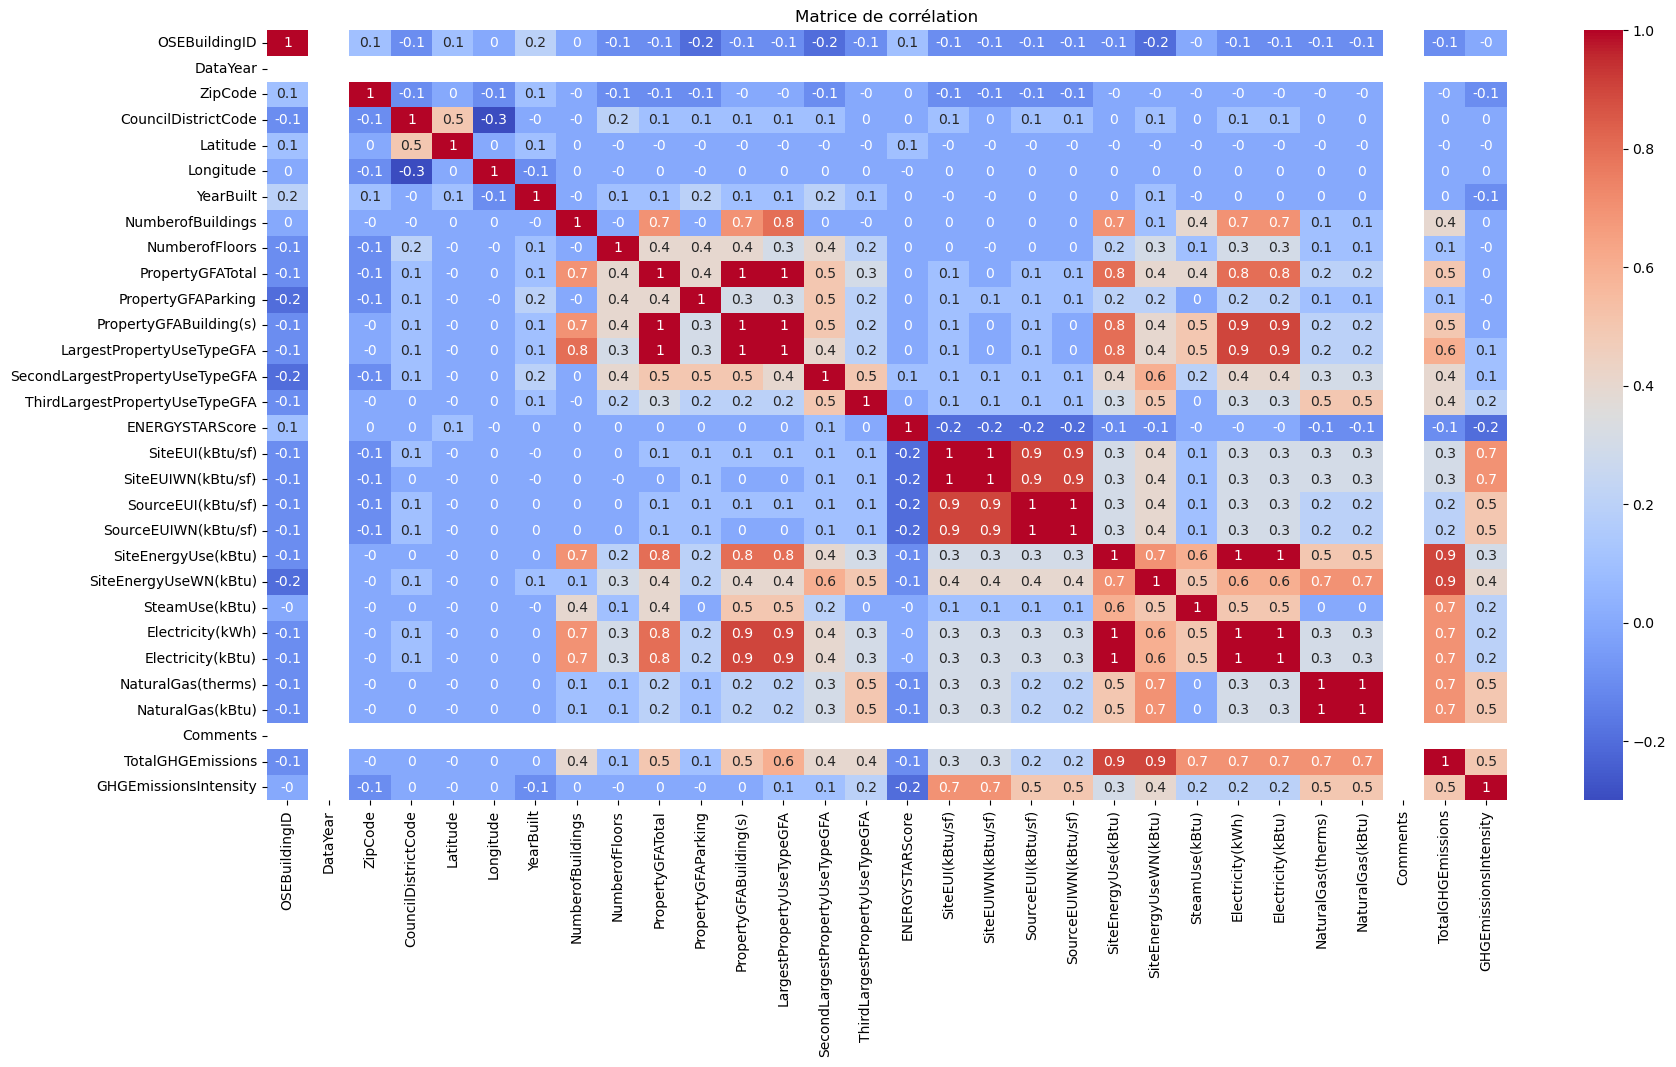

In [35]:
# Visualisation de la distribution des variables numériques
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[object])
# Visualisation des corrélations entre les variables numériques
correlation_matrix = numeric_features.corr().round(1)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [36]:
# Traitement des données manquantes
# Remplacer les valeurs manquantes par la médiane pour les variables numériques
for column in numeric_features.columns:
    data[column].fillna(data[column].median(), inplace=True)

# Remplacer les valeurs manquantes par la valeur la plus fréquente pour les variables catégorielles
for column in categorical_features.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
